In [199]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [200]:
from PIL import Image
from torchvision import transforms
img = Image.open('iith_logo.png')

inputImage = np.array(img)
inputshape = inputImage.shape


## Convolution Function

In [201]:
# defining a convolution function which takes image, kernel, padding, stride and the non linear function as input and outputs the convolved image 2d function
def convolve(image, kernel, padding, stride, non_linear_function):

    # padding the image
    image = np.pad(image, [(padding[0], padding[0]), (padding[1],
                   padding[1]), (0, 0)], 'constant', constant_values=0)

    # defining the output image
    output_width = np.floor((image.shape[0] - kernel.shape[0])/stride[0] + 1)
    output_height = np.floor((image.shape[1] - kernel.shape[1])/stride[1] + 1)
    outputImage = np.zeros((int(output_width), int(output_height)))

    # defining the stride
    stride = stride

    # defining the kernel
    kernel = kernel

    # defining the non linear function
    non_linear_function = non_linear_function

    # convolving the image
    for i in range(0, image.shape[0] - kernel.shape[0] + 1, stride[0]):
        for j in range(0, image.shape[1] - kernel.shape[1] + 1, stride[1]):
            outputImage[i//stride[0]][j//stride[1]] = non_linear_function(
                np.sum(image[i:i+kernel.shape[0], j:j+kernel.shape[1]]*kernel))

    return outputImage


In [202]:
box_blur = np.ones((3, 3, 4))/9
# identity = np.zeros((3,3,4))
# identity[1][1][1] = 1
# identity[1][1][0] = 1
# identity[1][1][2] = 1
# identity[1][1][3] = 1


In [203]:
# defining the non linear function
def sigmoid(x):
    return 1/(1+np.exp(-x))


def tanh(x):
    return np.tanh(x)


def relu(x):
    return np.maximum(0, x)


def parametric_relu(x):
    return np.maximum(0.2*x, x)


In [204]:
# convolving the image with the box blur kernel
convolvedImage = convolve(inputImage, box_blur, [1, 2], [2, 2], relu)
print(convolvedImage.shape)


(225, 226)


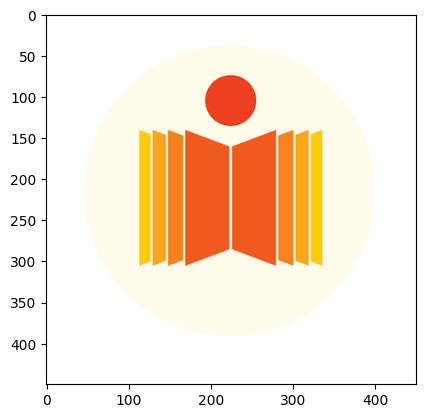

In [205]:
plt.imshow(inputImage)


[[[0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]]

 [[0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]]

 [[0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111 0.11111111]]]


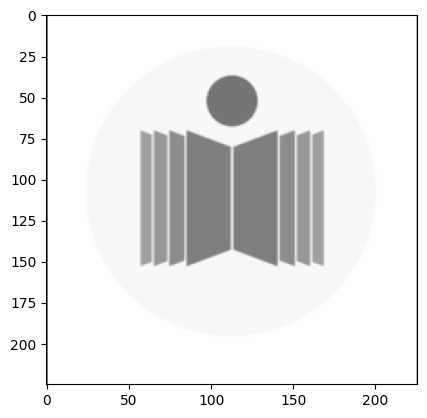

In [206]:
print(box_blur)
plt.imshow(convolvedImage, cmap='gray')


## Pooling Function

In [207]:
# pool function
def pooling(image, pooling_function, kernel_shape, stride):
    # defining the output image
    # floor function is used to get the integer value
    output_width = np.floor((image.shape[0] - kernel_shape[0])/stride[0] + 1)
    output_height = np.floor((image.shape[1] - kernel_shape[1])/stride[1] + 1)
    outputImage = np.zeros((int(output_width), int(output_height)))

    # defining the stride
    stride = stride

    # defining the kernel
    kernel_shape = kernel_shape

    # defining the pooling function
    pooling_function = pooling_function

    # pooling the image
    for i in range(0, image.shape[0] - kernel_shape[0] + 1, stride[0]):
        for j in range(0, image.shape[1] - kernel_shape[1] + 1, stride[0]):
            outputImage[i//stride[0]][j//stride[1]] = pooling_function(
                image[i:i+kernel_shape[0], j:j+kernel_shape[1]])

    return outputImage


In [208]:
def max_pooling(x):
    return np.max(x)


In [209]:
pooledImage = pooling(convolvedImage, max_pooling, [2, 2], [2, 2])


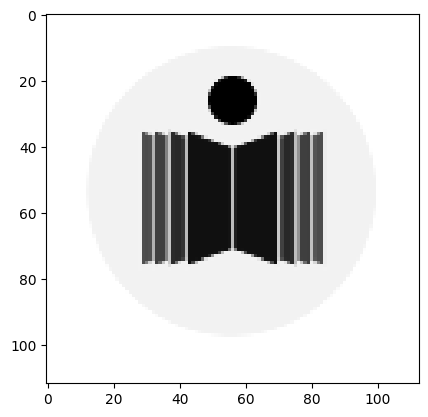

In [210]:
plt.imshow(pooledImage, cmap='gray')


## Convolution layer Function

In [211]:
# convolution layer function takes input image or activation maps,numbers of filters,kernel dimensions,stride,padding and non linear function as input and outputs the convolved image or activation map
def convolution_layer(input_image, num_filters, kernel_shape, stride=(1, 1), padding=(0, 0), non_linear_function=relu):
    # defining the output image
    output_width = np.floor(
        (input_image.shape[0] + 2*padding[0] - kernel_shape[0])/stride[0] + 1)
    output_height = np.floor(
        (input_image.shape[1] + 2*padding[1] - kernel_shape[1])/stride[1] + 1)
    outputImage = np.zeros(
        (int(output_width), int(output_height), num_filters))

    # defining the kernels
    kernel = np.random.rand(num_filters,kernel_shape[0], kernel_shape[1],input_image.shape[2])*0.1

    for k in range(num_filters):
        # convolving the image
        outputImage[:, :, k] = convolve(
            input_image, kernel[k], padding, stride, non_linear_function)

    return outputImage


In [212]:
convolvedImage2 = convolution_layer(
    inputImage, 4, [3, 3], [2, 2], [1, 1], relu)


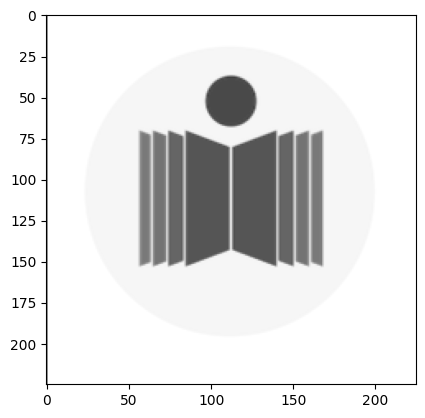

In [213]:
# print(convolvedImage2)
plt.imshow(convolvedImage2[:, :, 3], cmap='gray')


## Pooling layer Function

In [214]:
# pooling layer function accepts input image or activation maps, pooling function, kernel shape, stride and outputs the pooled image or pooled activation maps
def pooling_layer(input_image, pooling_function=max_pooling, kernel_shape=(1, 1), stride=(1, 1)):
    # defining the output image
    # floor function is used to get the integer value
    output_width = np.floor(
        (input_image.shape[0] - kernel_shape[0])/stride[0] + 1)
    output_height = np.floor(
        (input_image.shape[1] - kernel_shape[1])/stride[1] + 1)
    outputImage = np.zeros(
        (int(output_width), int(output_height), input_image.shape[2]))

    for k in range(input_image.shape[2]):
        # pooling the image
        outputImage[:, :, k] = pooling(
            input_image[:, :, k], pooling_function, kernel_shape, stride)

    return outputImage


In [215]:
pooledImage2 = pooling_layer(convolvedImage2, max_pooling, [2, 2], [2, 2])


(112, 112, 4)


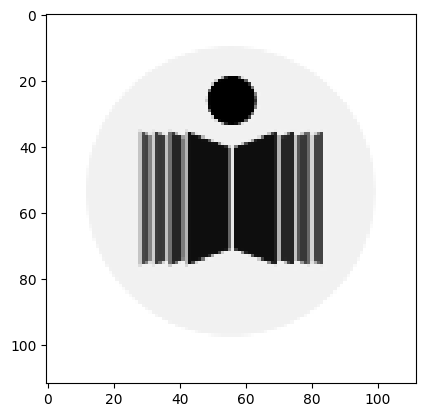

In [216]:
print(pooledImage2.shape)
plt.imshow(pooledImage2[:, :, 3], cmap='gray')


In [217]:
# special case for global average pooling
def global_average_pooling(input_image):
    return pooling_layer(input_image, np.mean, [input_image.shape[0], input_image.shape[1]], [input_image.shape[0], input_image.shape[1]])


In [218]:
global_average_pooled_image = global_average_pooling(convolvedImage2)
print(global_average_pooled_image)

[[[422.58817372 457.43617957 376.22283783 496.96311242]]]


## Flattening

In [219]:
# flatten function
def flatten(input_image, output_size=-1):
    input_layer = input_image.reshape(
        input_image.shape[0]*input_image.shape[1]*input_image.shape[2], 1) 
    if output_size == -1:
        return input_layer
    matrix = np.random.rand(output_size, input_layer.shape[0])
    output_layer = matrix@input_layer
    return output_layer


In [220]:
flatternedImage = flatten(pooledImage2, 10)


In [221]:
print(flatternedImage)


[[11127972.43150015]
 [11125396.23490705]
 [11095010.02418645]
 [11098864.80212547]
 [11081306.3602331 ]
 [11032353.98804616]
 [11030750.77532988]
 [11030012.86172454]
 [11081680.5094963 ]
 [11078844.88661807]]


## Multi-Layered Perceptron (MLP) Function

In [222]:
# multi layerd perceptron function which takes vector,the numbber of hidden layers,the size of each hidden layer, non linear function and output layer size as input and outputs the output layer
def multi_layer_perceptron(input_vector, num_hidden_layers, hidden_layer_sizes, non_linear_function, output_layer_size):
    # defining the output layer
    output_layer = np.zeros((output_layer_size, 1))

    # defining the weights and biases
    weights = []
    biases = []

    if num_hidden_layers > 0:
        weights.append(np.random.rand(
            hidden_layer_sizes[0], input_vector.shape[0])*0.01)
        biases.append(np.random.rand(hidden_layer_sizes[0], 1)*0.01)
        for i in range(1, num_hidden_layers):
            weights.append(np.random.rand(
                hidden_layer_sizes[i], hidden_layer_sizes[i-1])*0.01)
            biases.append(np.random.rand(hidden_layer_sizes[i], 1)*0.01)
        weights.append(np.random.rand(
            output_layer_size, hidden_layer_sizes[-1])*0.01)
        biases.append(np.random.rand(output_layer_size, 1)*0.01)
    else:
        weights.append(np.random.rand(
            output_layer_size, input_vector.shape[0])*0.01)
        biases.append(np.random.rand(output_layer_size, 1)*0.01)

    # forward propagation
    for i in range(num_hidden_layers):
        input_vector = non_linear_function(
            np.dot(weights[i], input_vector) + biases[i])
    output_layer = np.dot(weights[-1], input_vector) + biases[-1]

    return output_layer


In [223]:
input_layer = flatten(global_average_pooling(convolvedImage2), 10)
output_layer = multi_layer_perceptron(input_layer, 2, [2, 3], relu, 10)


In [224]:
print(output_layer.shape)
print(output_layer)


(10, 1)
[[0.0036757 ]
 [0.00665296]
 [0.01462582]
 [0.01304915]
 [0.00853943]
 [0.00289134]
 [0.01215329]
 [0.01748545]
 [0.00402802]
 [0.0106819 ]]


In [225]:
# softmax function
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))


In [226]:
print(softmax(np.array([1, 2, 3, 4, 5])))


[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [227]:
# mlp with softmax function
def multi_layer_perceptron_softmax(input_vector, num_hidden_layers, hidden_layer_sizes, non_linear_function, output_layer_size):
    scores = multi_layer_perceptron(
        input_vector, num_hidden_layers, hidden_layer_sizes, non_linear_function, output_layer_size)
    return softmax(scores)


In [228]:
input_layer = flatten(pooledImage2, 10)
output_layer_softmax = multi_layer_perceptron_softmax(
    input_layer, 2, [100, 50], sigmoid, 10)


In [229]:
print(output_layer, output_layer_softmax, np.sum(output_layer_softmax))
print(output_layer_softmax.shape)


[[0.0036757 ]
 [0.00665296]
 [0.01462582]
 [0.01304915]
 [0.00853943]
 [0.00289134]
 [0.01215329]
 [0.01748545]
 [0.00402802]
 [0.0106819 ]] [[0.10001848]
 [0.1000924 ]
 [0.10094793]
 [0.09797162]
 [0.10226237]
 [0.09958045]
 [0.09821209]
 [0.10012588]
 [0.09938126]
 [0.10140752]] 0.9999999999999999
(10, 1)


## Feed-forward path

In [230]:
# loading the cifar10 dataset
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True,
                   download=True, transform=transform)


Files already downloaded and verified


In [231]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [232]:
path = 'data/cifar-10-batches-py/data_batch_1'
dict = unpickle(path)
labels = dict[b'labels']
data = dict[b'data']
images = [None]*10
for i in range(10):
    image = data[labels.index(i)].reshape(3, 32, 32).transpose(1, 2, 0)
    images[i] = image


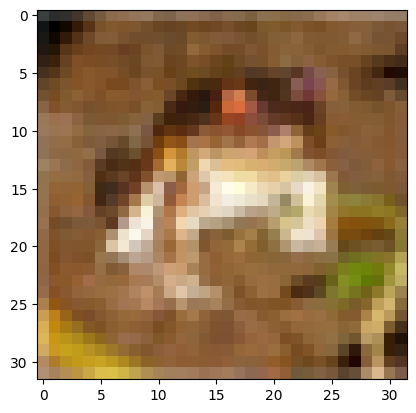

In [233]:
plt.imshow(images[6])


In [234]:
# CNN layer with forward propagation

def cnn(inputImage,return_flatten=False):
    # convolution layer with 16 filters of size 3x3 and sigmoid activation function
    convolvedImage = convolution_layer(
        inputImage, 16, [3, 3], [1, 1], [0, 0], sigmoid)
    # max pooling layer with kernel size 2x2 and stride 2x2
    pooledImage = pooling_layer(convolvedImage, max_pooling, [2, 2], [2, 2])
    # convolution layer with 8 filters of size 3x3 and sigmoid activation function
    convolvedImage2 = convolution_layer(
        pooledImage, 8, [3, 3], [1, 1], [0, 0], sigmoid)
    # max pooling layer with kernel size 2x2 and stride 2x2
    pooledImage2 = pooling_layer(convolvedImage2, max_pooling, [2, 2], [2, 2])
    # global average pooling layer
    globalAveragePooledImage = global_average_pooling(pooledImage2)
    # flatten layer
    flattenImage = flatten(globalAveragePooledImage)
    if return_flatten:
        return flattenImage
    # mlp with 1 hidden layer same size as input layer and sigmoid activation function with softmax output of size 10
    output_layer_softmax = multi_layer_perceptron_softmax(
        flattenImage, 1, [flattenImage.shape[0]], sigmoid, 10)    
    return output_layer_softmax


In [235]:
output1 = cnn(images[4])
print(output1)


[[0.10029993]
 [0.0993484 ]
 [0.1000113 ]
 [0.10100158]
 [0.09956502]
 [0.10023247]
 [0.0998957 ]
 [0.10068992]
 [0.10020545]
 [0.09875022]]


## Question 8

In [236]:
for i in range(10):
    output = cnn(images[i])
    print("output {} is {}".format(i, output.transpose()))

output 0 is [[0.09965551 0.09939097 0.10048524 0.10026815 0.10107759 0.09997336
  0.10049402 0.0990833  0.09951791 0.10005396]]
output 1 is [[0.1003316  0.10021672 0.09966721 0.09999566 0.0998904  0.10043202
  0.10075121 0.10066239 0.09888778 0.099165  ]]
output 2 is [[0.10006123 0.09978596 0.10001007 0.0999402  0.10019385 0.09905437
  0.1004152  0.10108386 0.09975531 0.09969995]]
output 3 is [[0.09986327 0.10083493 0.1003852  0.09927301 0.1004115  0.0995099
  0.10018823 0.09971025 0.10041936 0.09940435]]
output 4 is [[0.0995078  0.10035659 0.09929294 0.10009965 0.10002015 0.10061532
  0.10058325 0.09945041 0.10040932 0.09966457]]
output 5 is [[0.09939721 0.09957144 0.10024824 0.10075045 0.10011773 0.10040559
  0.10071514 0.10109375 0.09874985 0.09895062]]
output 6 is [[0.09998849 0.10027203 0.10008157 0.09969006 0.09960447 0.10007045
  0.1000098  0.10042947 0.10011107 0.0997426 ]]
output 7 is [[0.09970548 0.10114398 0.10012638 0.0994108  0.09936101 0.09995113
  0.10023136 0.10027621 0

(a) We cannot find a particular trend between the output vectors.They seem to be similar


(b) No the randomly initialized vector doesn't seem to show any discriminality. In the sense that it doesn't prefer any particular class

In [237]:
images3 = {}
for i in range(10):
    images3[i]=[]

for i in range(len(data)):
    images3[labels[i]].append(data[i].reshape(3,32,32).transpose(1,2,0))

In [238]:
results = []
for i in range(10):
    for j in range(3):
        output = cnn(images3[i][j],return_flatten=True)
        results.append(output)
results = np.array(results)
results = results.reshape((results.shape[0],results.shape[1]))

In [239]:
from sklearn.decomposition import PCA

In [240]:
pca = PCA(n_components=2)
pca.fit(results)
results_pca = pca.transform(results)

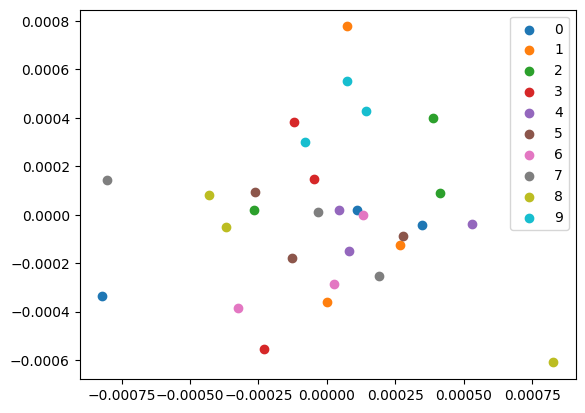

In [241]:
for i in range(10):
    plt.scatter(results_pca[3*i:3*(i+1), 0],results_pca[3*i:3*(i+1), 1], label = "{}".format(i))
    plt.legend()
plt.show()